In [1]:


import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp



In [3]:

n=1000 #numero de datos aleatoreos o tamaño de la muestra
mean= 0 #media de la muestra
sigma=1 #desviacion estandar
muestra=np.random.normal(loc=mean, scale=sigma, size=n) #Esta función genera una muestra aleatoria de números siguiendo una distribución normal.



def bootstrap(x,func,m=1000): #m es el remuestreo y x es la muestra
    y=np.zeros(m)
    for i in range(m):
        a= np.random.choice(x,size=len(x), replace=True)
        y[i]=func(a)
    return y



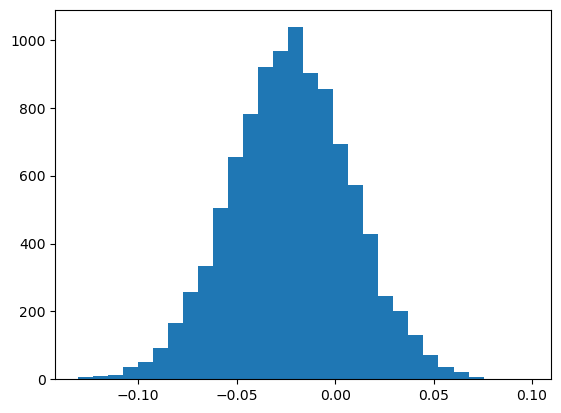

In [4]:


bootstrap_medias = bootstrap(muestra, np.mean, m=10000)
bootstrap_varianzas = bootstrap(muestra, np.var, m=10000)

plt.hist(bootstrap_medias,bins=30)
plt.savefig('bootstrap_medias.pdf', dpi=300, bbox_inches='tight')

plt.show()


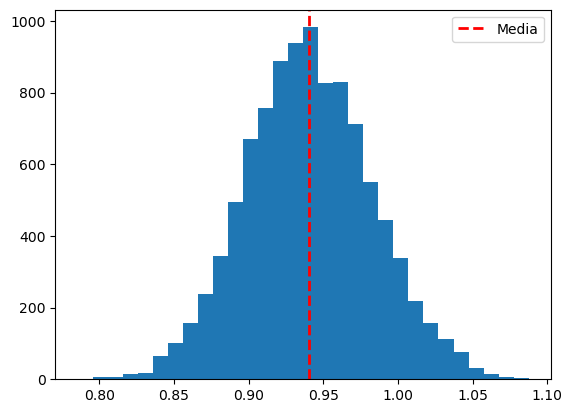

[0.8587365  0.93965661 1.02670599]


In [5]:


plt.hist(bootstrap_varianzas,bins=30)
plt.axvline(bootstrap_varianzas.mean(), color='r', linestyle='dashed', linewidth=2, label='Media')
plt.legend()
plt.savefig('boostrap_varianzas.pdf', dpi=300, bbox_inches='tight')

plt.show()

q=np.quantile(bootstrap_varianzas,[0.025,0.5,0.975])
print(q)

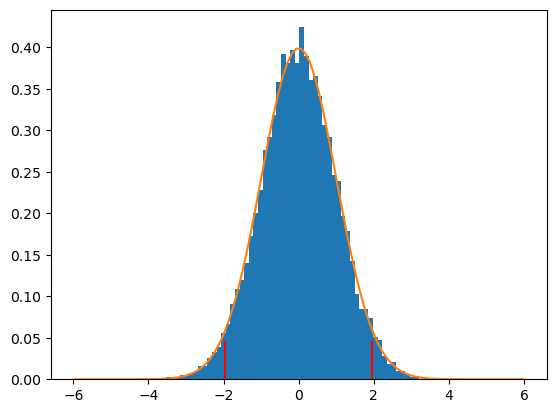

In [6]:
z=(bootstrap_medias-bootstrap_medias.mean())/(bootstrap_medias.std())
plt.hist(z,density=True,bins='auto')
x=np.linspace (-6.0,6.0,100)
y=sp.norm.pdf(x,loc=0.0,scale=1.0)
plt.plot(x,y,label='normal')

y1=sp.norm.ppf(0.025,loc=0.0,scale=1.0) #ppf es la funcion que devuelve los valores de t
plt.axvline(y1,0,0.1,color='red')
y1=sp.norm.ppf(0.975,loc=0.0,scale=1.0)
plt.axvline(y1,0,0.1,color='red')
plt.savefig('boostrap.pdf', dpi=300, bbox_inches='tight')
plt.show()